# Prédire le prix d’une maison 🏠

🎯 Dans ce défi, vous allez **prédire le prix de vente** des maisons ('SalePrice') en fonction de la *surface*, du *nombre de chambres* ou de la *qualité globale*.

## Charger des bibliothèques Python

Exécutez la cellule ci-dessous pour `importer` des bibliothèques Python - ce seront nos outils pour travailler avec les données📊


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

--------------

## Charger le jeu de données

👇 Exécutez la cellule ci-dessous pour charger le jeu de données `house_prices.csv` en tant que `DataFrame` avec pandas, et afficher ses 5 premières lignes.

*Remarque : les jeux de données ont été nettoyés à des fins d’apprentissage*

In [2]:
houses = pd.read_csv('https://storage.googleapis.com/introduction-to-data-science/house-prices.csv')
houses.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallQual,SalePrice
0,1710,3,1,7,208500
1,1262,3,1,6,181500
2,1786,3,1,7,223500
3,1717,3,1,7,140000
4,2198,4,1,8,250000


Cet ensemble de données contient des informations sur les maisons vendues.

Les *colonnes* de l’ensemble de données sont les suivantes :

*Features:*
- `GrLivArea`: Surface en mètres carrés
- `BedroomAbvGr`: Nombre de chambres
- `KitchenAbvGr`: Nombre de cuisines
- `OverallQual`: Qualité générale (1 : Très médiocre / 10 : Très excellent)

*Target:*
- `SalePrice`: Prix de vente en USD (dollar)

--------------

## Nous pouvons obtenir beaucoup d’informations sans ML! 🤔

### À vous de jouer ! 🚀

Commençons par **comprendre les données dont nous disposons** - quelle est la taille de l’ensemble de données, quelles sont les informations (colonnes) dont nous disposons, etc.

** 💡 Astuce :** n’oubliez pas de vérifier le TP sur les voitures  pour connaître les bonnes méthodes

In [3]:
#code ici
houses.shape

(1759, 5)

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1759 non-null   int64
 1   BedroomAbvGr  1759 non-null   int64
 2   KitchenAbvGr  1759 non-null   int64
 3   OverallQual   1759 non-null   int64
 4   SalePrice     1759 non-null   int64
dtypes: int64(5)
memory usage: 68.8 KB


<Axes: >

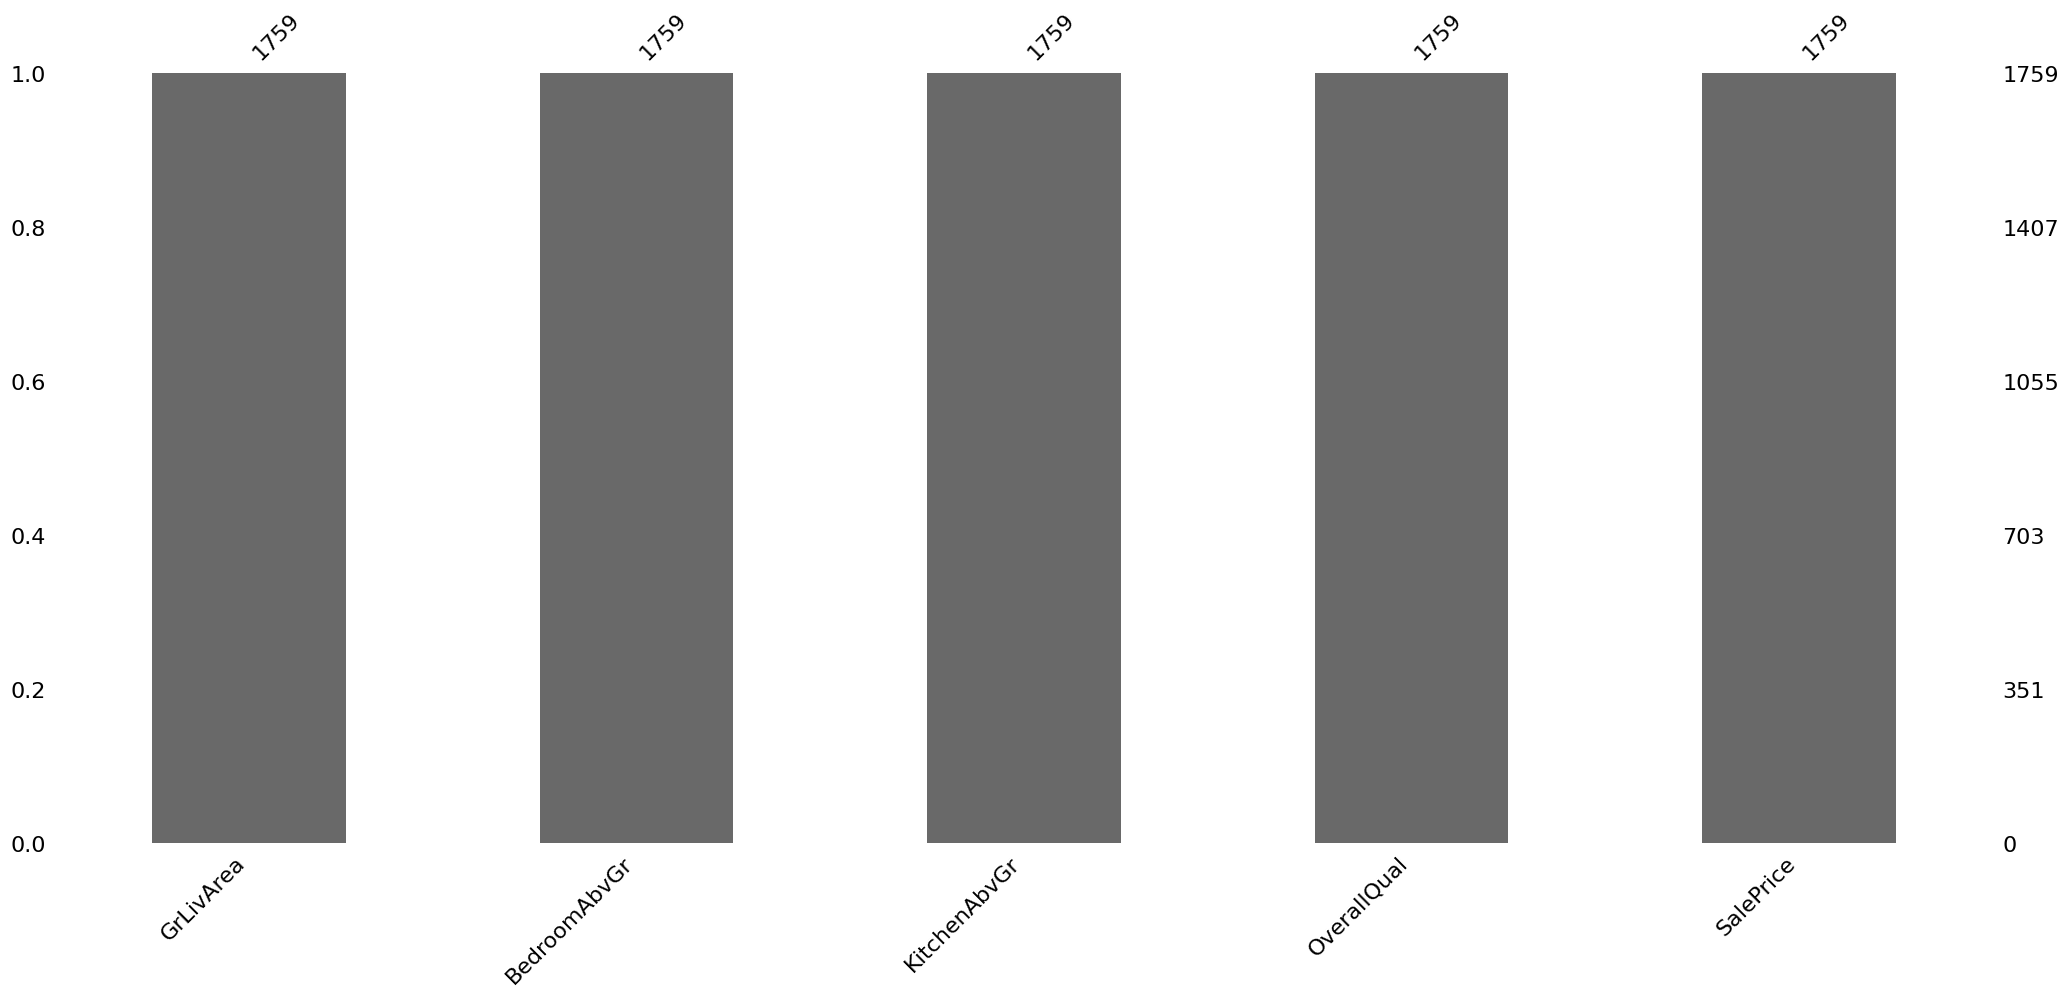

In [5]:
import missingno as msno # pour visualiser les valeurs manquantes
msno.bar(houses) 

Nous constatons que il y'a pas de valeurs manquantes sur ce dataframe

In [6]:
houses.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallQual,SalePrice
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000
mean,1526.309835,2.868107,1.050028,6.108584,182319.696418
std,546.295381,0.832844,0.225756,1.399305,82156.957913
min,334.000000,0.000000,0.000000,1.000000,34900.000000
25%,1130.500000,2.000000,1.000000,5.000000,129950.000000
50%,1470.000000,3.000000,1.000000,6.000000,163500.000000
75%,1786.500000,3.000000,1.000000,7.000000,214950.000000
max,5642.000000,8.000000,3.000000,10.000000,755000.000000


Maintenant, essayez de **se séparer de certaines colonnes** - disons que nous voulons seulement voir `SalePrice`, ou `GrLivArea` et `BedroomAbvGr`:

In [7]:
# code ici 
houses["SalePrice"]


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1754    210000
1755    155000
1756    173000
1757    104000
1758    108000
Name: SalePrice, Length: 1759, dtype: int64

In [8]:
houses[["GrLivArea","BedroomAbvGr"]]

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4
...,...,...
1754,2073,3
1755,1125,2
1756,1640,3
1757,2229,5


-------

### À vous de jouer - Maintenant, faisons un peu de **visualisation** 📊. 


Suivons une intuition de base - **la surface ('GrLivArea') affecte-t-elle le prix de la maison('SalePrice')❓**

Utilisons un [Seaborn Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) - une méthode à l’intérieur de la bibliothèque Seaborn (que nous avons importée ci-dessus et abrégée en `sns`) qui nous donne un graphique avec des points de données sous forme de points avec des valeurs `x` et `y`.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

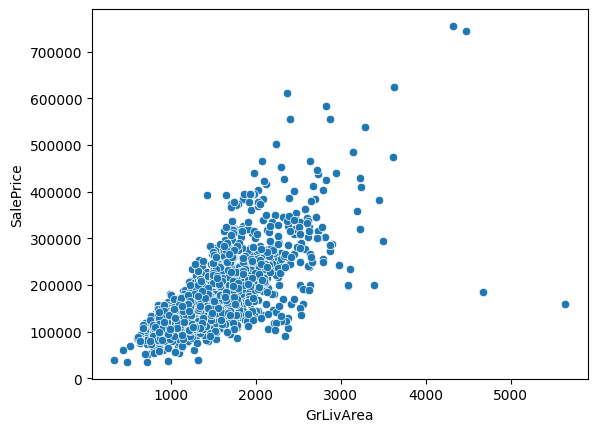

In [9]:
# code ici
sns.scatterplot(data=houses, x="GrLivArea", y="SalePrice")

mais sous forme de phrase: Tendance générale : Il existe une corrélation positive entre la surface habitable ("GrLivArea") et le prix de vente ("SalePrice"). Plus la surface habitable est grande, plus le prix a tendance à augmenter.

Dispersion des données :

Pour une même surface habitable (valeur similaire sur l'axe des abscisses), les prix de vente peuvent varier considérablement (valeurs étalées sur l'axe des ordonnées). Cela suggère que d'autres facteurs influencent également le prix.

Certains points s'écartent de la tendance générale, notamment pour les grandes surfaces (> 4000), où les prix ne suivent pas toujours une augmentation proportionnelle.

Valeurs extrêmes :

Quelques points semblent isolés, comme une propriété avec une surface très élevée (> 5000) mais un prix relativement bas par rapport à la tendance. Cela pourrait indiquer des anomalies ou des cas particuliers (par exemple, des propriétés nécessitant des rénovations).

Plages de valeurs :

"GrLivArea" varie principalement entre 1000 et 5000.

"SalePrice" s'étend d'environ 100000 à 700000, avec une concentration dans les valeurs intermédiaires.

La qualité globale (`OverallQual`) a-t-elle un impact sur le `SalePrice` ❓ **

**💡Astuce :** Vous pouvez ajouter une `hue` au graphique précédent

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

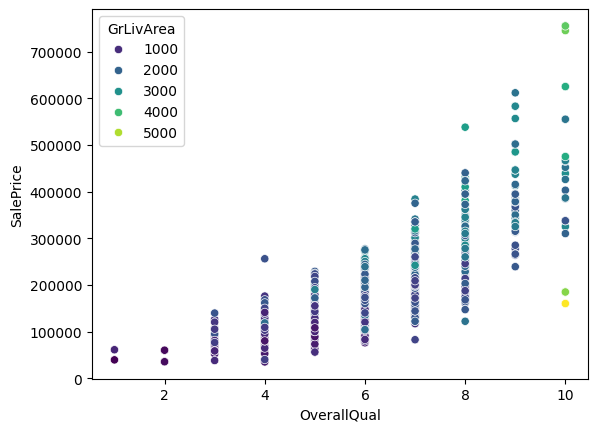

In [10]:
# code ici
sns.scatterplot(data=houses, x="OverallQual", y="SalePrice",hue="GrLivArea", palette="viridis")

Le graphe indique que le prix dépend à la fois de la taille et de la qualité du bien

Comprenons également la répartition que nous avons pour certaines fonctionnalités :

- **Quelle est la répartition du nombre de chambres❓**
- **Quelle est la répartition du nombre de cuisines❓**

Seaborn `countplot` est là pour vous aider.

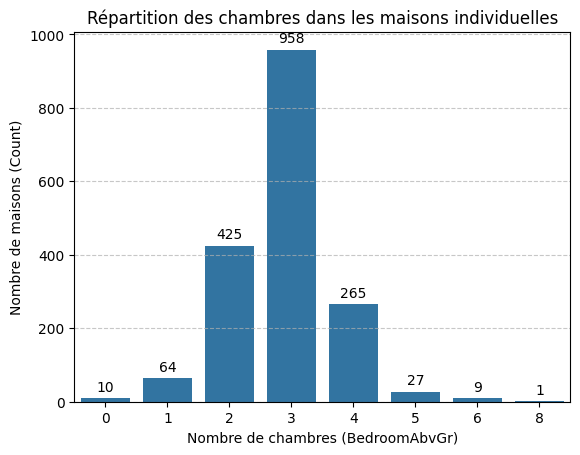

In [11]:
# code ici
bars = sns.countplot(data=houses, x="BedroomAbvGr")
plt.title("Répartition des chambres dans les maisons individuelles")
plt.xlabel('Nombre de chambres (BedroomAbvGr)')
plt.ylabel('Nombre de maisons (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout des valeurs sur les barres 
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        bars.annotate(f'{int(height)}',
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),  # décalage vertical de 3 points
                      textcoords="offset points",
                      ha='center', va='bottom',
                      fontsize=10)
plt.show()

Explications des corrections :
Accès aux barres dans Seaborn :

Avec sns.countplot(), les barres sont stockées dans bars.containers (une liste de containers)

On doit itérer d'abord sur les containers, puis sur les barres

Méthode d'annotation :

J'utilise bars.annotate() au lieu de plt.text() pour une meilleure intégration

Le paramètre xytext=(0, 3) crée un petit décalage vertical

Suppression du plt.xticks() :

Inutile car Seaborn gère déjà bien les ticks

Ce graphique montre que la plupart des logements ont entre 2 et 4 chambres, avec une forte prédominance des 3 chambres. Les configurations extrêmes (0, 1, ou 6+ chambres) sont beaucoup plus rares, ce qui peut refléter la demande du marché ou les spécificités du dataset analysé.

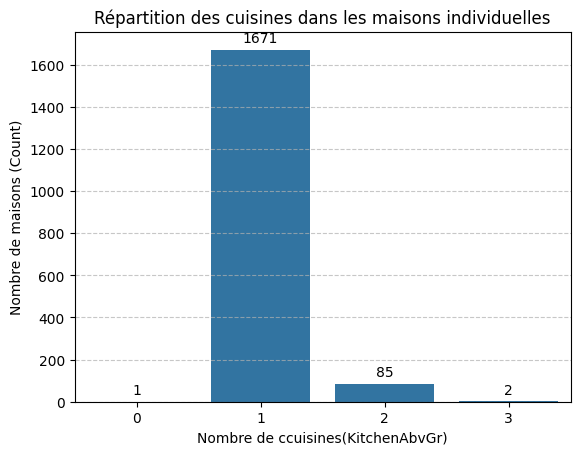

In [12]:
bars = sns.countplot(data=houses, x="KitchenAbvGr")
plt.title("Répartition des cuisines dans les maisons individuelles")
plt.xlabel('Nombre de ccuisines(KitchenAbvGr)')
plt.ylabel('Nombre de maisons (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajout des valeurs sur les barres - CORRECTION ICI
for container in bars.containers:
    for bar in container:
        height = bar.get_height() # Affiche la valeur brute (nombre entier de maisons) pour chaque barre.
        bars.annotate(f'{int(height)}', #Ajoute l'annotation sur la barre
                      xy=(bar.get_x() + bar.get_width() / 2, height), # Ajuste la position de l'annotation au centre de la barre
                      xytext=(0, 3),  # décalage vertical de 3 points
                      textcoords="offset points", # Ajuste le texte par rapport à la position de l'annotation
                      ha='center', va='bottom', # Alignement horizontal et vertical du texte
                      fontsize=10) # Taille de police de l'annotation
plt.show()

C:\Users\ngale\AppData\Local\Temp\ipykernel_10748\2887697442.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=houses, x="KitchenAbvGr", palette="Blues_d")


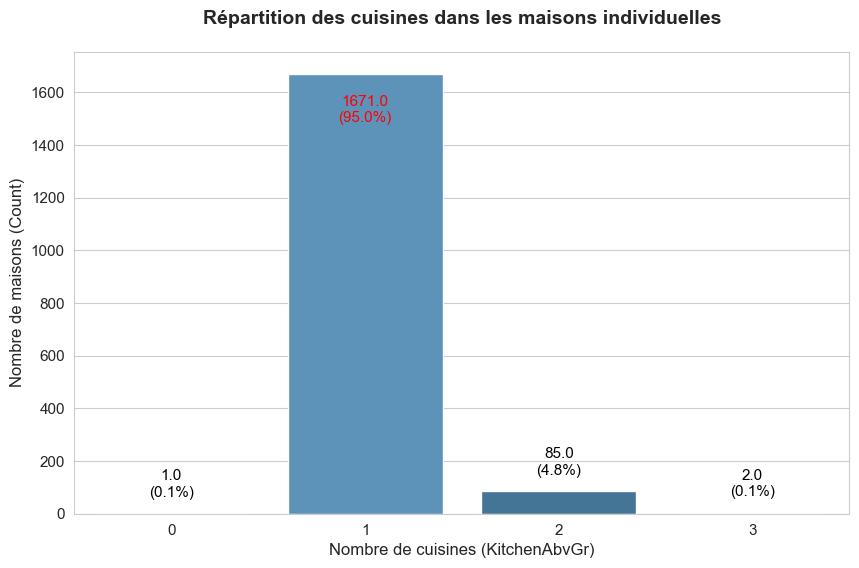

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration du style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Création du graphique
ax = sns.countplot(data=houses, x="KitchenAbvGr", palette="Blues_d")

# Personnalisation avancée
plt.title("Répartition des cuisines dans les maisons individuelles", 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Nombre de cuisines (KitchenAbvGr)', fontsize=12)
plt.ylabel('Nombre de maisons (Count)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(range(0, 1800, 200), fontsize=11)  # Échelle Y explicite

# Ajout des valeurs avec formatage conditionnel
for p in ax.patches:
    height = p.get_height() # Affiche la valeur brute (nombre entier de maisons) pour chaque barre.
    ax.annotate(
        f'{height}\n({height/len(houses):.1%})' if height > 0 else '',  # Ajoute le pourcentage
        (p.get_x() + p.get_width() / 2., height), 
        ha='center', 
        va='bottom' if height < 100 else 'top',  # Position intelligente
        xytext=(0, 10 if height < 100 else -15),  # Ajustement dynamique
        textcoords='offset points',
        fontsize=11,
        color='red' if height == 1671 else 'black'  
    )


--------------

## Modèle - Régression linéaire 📈

**1.** Tout d’abord, créons features et notre target.

Créez une variable `features` contenant toutes les fonctionnalités :

In [14]:
# code ici
# your code here
features =houses.drop(["SalePrice"], axis="columns")

Créez une variable `target` contenant la cible :

In [15]:
# code ici
target = houses["SalePrice"]

N’hésitez pas à vérifier ce qu’il y a dans vos `features` et votre `target` ci-dessous :

In [16]:
# code ici
features

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallQual
0,1710,3,1,7
1,1262,3,1,6
2,1786,3,1,7
3,1717,3,1,7
4,2198,4,1,8
...,...,...,...,...
1754,2073,3,1,6
1755,1125,2,1,5
1756,1640,3,1,6
1757,2229,5,1,6


In [17]:
# code ici
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1754    210000
1755    155000
1756    173000
1757    104000
1758    108000
Name: SalePrice, Length: 1759, dtype: int64

--------------

**2.** Il est temps d'**importer** la fonction *sklearn* pour diviser notre jeu de données en un train et au test set

Essayez de trouver la bonne fonction [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

In [18]:
# code ici
from sklearn.model_selection import train_test_split

--------------

**3.** Utilisez cette fonction pour créer **X_train, X_test, y_train, y_test**

🚨 Poser `random_state=42` en tant qu’argument de la fonction.

In [19]:
# code ici
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

Vérifiez ce qu’il y a dans les `X_train`, `X_test`, `y_train`, `y_test`:

- Quel pourcentage des observations a été alloué au train et au test ?
- Combien y a-t-il de dimension dans `X_train` et `X_test`

In [20]:
# code ici
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print(f"Pourcentage dans l'ensemble d'apprentissage: {round(X_train.shape[0]/features.shape[0], 2)}%")
print(f"Pourcentage dans l'ensemble de test: {round(X_test.shape[0]/features.shape[0], 2)}%")
X_train.head()

X_train (1319, 4)
X_test (440, 4)
y_train (1319,)
y_test (440,)
Pourcentage dans l'ensemble d'apprentissage: 0.75%
Pourcentage dans l'ensemble de test: 0.25%


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallQual
1027,1376,3,1,5
842,1800,6,2,5
757,1501,3,1,7
218,1248,2,1,7
1131,2210,5,1,6


--------------

**4.** Temps nécessaire pour **importer** le modèle de régression linéaire

Les bibliothèques Python comme [Scikit-learn](https://scikit-learn.org/0.21/modules/classes.html) permettent aux personnes qui se lancent dans la science des données et le ML d’expérimenter très facilement.

Le code est déjà dans la bibliothèque, il s’agit juste **d’appeler les bonnes méthodes !** 🛠

In [21]:
# code ici
from sklearn.linear_model import LinearRegression

Maintenant, pour **initialiser** le modèle. Stockez-le dans une variable `model`:

In [22]:
# code ici
model = LinearRegression()

--------------

**5. Train** le modèle sur le **training set**. 

Il s’agit du processus par lequel le modèle de régression linéaire recherche la ligne qui correspond le mieux à tous les points du jeu de données. C’est la partie où l’ordinateur est à fond en train d’apprendre ! 🤖

In [23]:
# code ici
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.score(X_train, y_train)

0.7261579164933417

--------------

**6. Évaluer** les performances du modèle sur le **test set**.

Les modèles peuvent avoir différentes mesures de notation par défaut. Par défaut, la régression linéaire utilise ce que l’on appelle le `R-squared`, une métrique qui indique dans quelle mesure la variation de la cible (`SalePrice`) peut être expliquée par les modifications apportées aux caractéristiques (`GrLivArea`, `BedroomAbvGr`, `KitchenAbvGr` and `OverallQual`)

In [24]:
# code ici
model.score(X_test, y_test) 

0.6867680844882273

Nous constatons que le modèle explique environ 68,7 % de la variance des données de test.
Et ce  score  veut dire que le modèle fait un bon travail dans 68,7 % des cas pour prédire les bonnes valeurs. Le reste (31,3 %) lui échappe encore un peu.

Ici, le modèle est évalué sur les données de test (X_test, y_test), c'est-à-dire sur des données qu'il n'a pas vues pendant son entraînement. Ce score mesure donc la capacité du modèle à généraliser à de nouvelles données.

⚠️ **Attention à ne pas confondre cela avec l’accuracy**. Le nombre ci-dessus montre que **"les entrées dont nous disposons peuvent nous aider à prédire ce pourcentage de variation de la dépréciation"** Ce qui est décent étant donné que nous l’avons fait avec seulement quelques lignes de code ! 

Comparons ce score à celui obtenu par le modèle sur le **training set**:

In [25]:
# code ici
model.score(features, target)

0.7158114941506069

Ici, le modèle est évalué sur les données d'entraînement (features, target). Ce score montre la performance du modèle sur les données sur lesquelles il a été entraîné.

👉 Vous devriez obtenir un score légèrement plus élevé sur l’ensemble d’entraînement, ce qui est normal en général.

La bonne nouvelle, c’est que les 2 scores sont relativement proches l’un de l’autre, ce qui montre que nous avons atteint un **bon équilibre**, notre modèle **généralise bien aux nouvelles observations**, expliquant plus de 70% de la variation de la dépréciation.

**Le fractionnement du jeu de données en un ensemble d’apprentissage et un ensemble de test est essentiel dans le Machine Learning**. Il nous permet d’identifier :
- **Surapprentissage** : on verrait une grande différence entre les 2 scores. Le modèle serait très bon sur les données sur lesquelles il s’est entraîné, mais serait mauvais sur l’ensemble de test.
- **Sous-ajustement** : nous aurions un mauvais score à la fois sur les données d’entraînement et sur les données de test. Dans ce cas, cela pourrait s’expliquer par le fait que le modèle n’est pas assez complexe pour capturer les modèles dans les données.

Dans notre cas, nous avons un **modèle robuste** qui fonctionne bien sur de nouvelles observations💪. Nous pouvons maintenant l’utiliser pour faire des prédictions sur les nouvelles maisons en toute confiance.

--------------

**7.** Prédisons le prix d’une maison 🔮 neuve

Cette nouvelle maison présente les caractéristiques suivantes :
- **Surface** de 3 000 pieds carrés
- 3 **bedrooms**
- 1 **kitchen**
- **Overall quality** score de 5

**7.1** Commencez par créer la variable `new_house` dans laquelle vous stockerez ces caractéristiques. Assurez-vous d’utiliser le bon format pour pouvoir faire une prédiction.

*Note : voici un rappel des colonnes du tableau :* `['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual']`


<details>
    <summary>💡Indice</summary>
<p> 
<pre>
`new_house` should be a `list of list`:
    [[surface, nb_bedrooms, nb_kitchens, overall_quality]]
</pre>
</details>

**7.2** Utilisez maintenant la bonne méthode pour faire une prédiction à l’aide du modèle que nous venons d’entraîner:

In [31]:
# code ici
new_car = [[3000, 3, 1,5]]

In [38]:
model.predict(new_car)

C:\Users\ngale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([250739.40897715])

Supposons maintenant que nous ayons une autre maison avec les mêmes caractéristiques, à l’exception du score de qualité global de 9. 

**Quel serait le prix de cette maison❓**

In [33]:
# code ici
new_car1 = [[3000, 3, 1,9]]

In [34]:
model.predict(new_car1)

C:\Users\ngale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([373362.59725533])

--------------

**8.** **Explication** du modèle

La régression linéaire est un [linear model](https://scikit-learn.org/stable/modules/linear_model.html), Son explicabilité est donc assez élevée.

**8.1.** Nous pouvons vérifier le `coef_` ou les **coefficients** du modèle. Ceux-ci expliquent dans quelle mesure la cible (`SalePrice`) change avec une variation de `1` dans chacune des caractéristiques (inputs), tout en maintenant les autres caractéristiques constantes.

In [35]:
# code ici
model.coef_

array([    69.70950885, -12154.48605308, -22959.87354252,  30655.79706955])

🤔 Nous aurions besoin de vérifier à nouveau l’ordre des colonnes, pour savoir quel nombre est quel input. Mais, **nous avons ce qu’il vous faut !** Exécutez la cellule ci-dessous :

In [29]:
pd.concat([pd.DataFrame(features.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

,0,0
0,GrLivArea,69.709509
1,BedroomAbvGr,-12154.486053
2,KitchenAbvGr,-22959.873543
3,OverallQual,30655.797070


**8.2** L’autre chose que nous pouvons vérifier est l'**intercept** du modèle. Il s’agit de la cible (`SalePrice`) lorsque toutes les entrées sont égales à 0. Cela devrait donc être proche d’une maison neuve avec une surface de 0 pieds carrés, pas de chambres, pas de cuisines et une qualité globale de 0 :

In [36]:
# code ici
model.intercept_

np.float64(-52244.771208916995)